In [1]:
import pandas as pd
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv("../dataset/covid19vaccinesbycounty.csv",usecols=[0,1,13])

In [49]:
df.tail()

,county,administered_date,cumulative_fully_vaccinated
8005,Yuba,2021-04-23,13675
8006,Yuba,2021-04-24,13753
8007,Yuba,2021-04-25,13780
8008,Yuba,2021-04-26,13875
8009,Yuba,2021-04-27,13977


In [9]:
df.describe()

,cumulative_fully_vaccinated
count,8.010000e+03
mean,1.780937e+05
std,9.421768e+05
min,0.000000e+00
25%,5.770000e+02
50%,6.355500e+03
75%,4.457450e+04
max,1.196178e+07


In [3]:
df['administered_date'] = pd.DatetimeIndex(df['administered_date'])
df.dtypes

county                                 object
administered_date              datetime64[ns]
cumulative_fully_vaccinated             int64
dtype: object

In [4]:
#Getting the county wise data
import datetime
df = df.loc[(df["county"] == "Santa Clara")]
del df['county']
df.head(7)

,administered_date,cumulative_fully_vaccinated
5949,2020-12-15,0
5950,2020-12-16,0
5951,2020-12-17,0
5952,2020-12-18,0
5953,2020-12-19,0
5954,2020-12-20,0
5955,2020-12-21,0


In [5]:
#preprocessing
df = df.iloc[::-1]
df.head()

,administered_date,cumulative_fully_vaccinated
6082,2021-04-27,627843
6081,2021-04-26,622321
6080,2021-04-25,615467
6079,2021-04-24,611860
6078,2021-04-23,605686


In [54]:
df.tail()

,administered_date,cumulative_fully_vaccinated
5953,2020-12-19,0
5952,2020-12-18,0
5951,2020-12-17,0
5950,2020-12-16,0
5949,2020-12-15,0


In [6]:
#setting the date time index on date column
df['ds'] = pd.DatetimeIndex(df['administered_date'])
df.drop('administered_date', axis=1, inplace=True)
df_train = df[0:]

In [7]:
#renaming the columns as required by the prophet
df_train.columns = ['y','ds']
df_train.tail()

,y,ds
5953,0,2020-12-19
5952,0,2020-12-18
5951,0,2020-12-17
5950,0,2020-12-16
5949,0,2020-12-15


In [20]:
m = Prophet(interval_width=0.95)
model = m.fit(df_train)
future = m.make_future_dataframe(periods=180,freq='D')
forecast = m.predict(future)
forecast.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-15,-160.017301,-6287.400148,3373.250459,-160.017301,-160.017301,-1255.241331,-1255.241331,-1255.241331,-1255.241331,-1255.241331,-1255.241331,0.0,0.0,0.0,-1415.258632
1,2020-12-16,-165.633029,-5072.283700,4320.483831,-165.633029,-165.633029,-226.767174,-226.767174,-226.767174,-226.767174,-226.767174,-226.767174,0.0,0.0,0.0,-392.400203
2,2020-12-17,-171.248758,-3684.646081,5882.106473,-171.248758,-171.248758,1128.742573,1128.742573,1128.742573,1128.742573,1128.742573,1128.742573,0.0,0.0,0.0,957.493815
3,2020-12-18,-176.864486,-2373.581466,6964.248219,-176.864486,-176.864486,2427.798125,2427.798125,2427.798125,2427.798125,2427.798125,2427.798125,0.0,0.0,0.0,2250.933639
4,2020-12-19,-182.480214,-3920.490939,5786.924564,-182.480214,-182.480214,1095.670799,1095.670799,1095.670799,1095.670799,1095.670799,1095.670799,0.0,0.0,0.0,913.190585


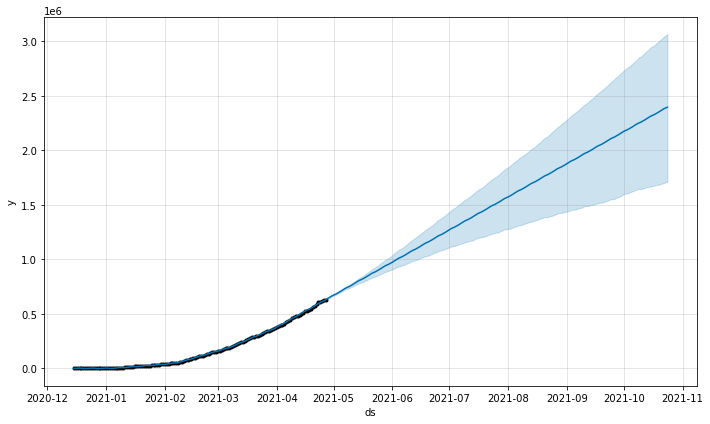

In [24]:
plot1 = m.plot(forecast)

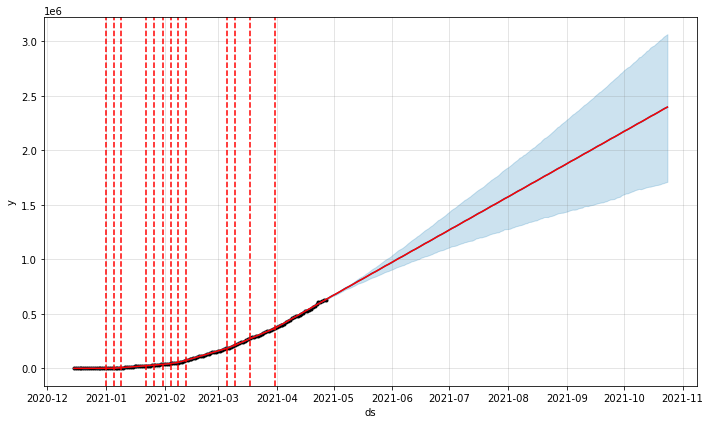

In [25]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

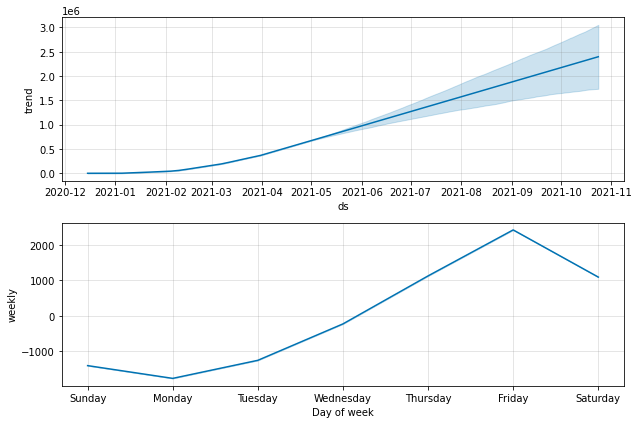

In [71]:
plt2 = m.plot_components(forecast)

In [26]:
vp = forecast[['ds','yhat']]
vp

,ds,yhat
0,2020-12-15,-1.415259e+03
1,2020-12-16,-3.924002e+02
2,2020-12-17,9.574938e+02
3,2020-12-18,2.250934e+03
4,2020-12-19,9.131906e+02
...,...,...
309,2021-10-20,2.357305e+06
310,2021-10-21,2.368464e+06
311,2021-10-22,2.379566e+06
312,2021-10-23,2.388038e+06


In [73]:
population = 1967585.0
date_op = "2021-07-19"
for index, row in vp.iterrows():
    if(row['yhat'] > population):
        date_op = row['ds']
        break;
date_op

Timestamp('2021-09-10 00:00:00')

In [21]:
#validation of prediction model
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='100 days', period='15 days', horizon = '30 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2021-03-28 00:00:00 and 2021-03-28 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-03-29,353032.789759,350234.501242,355725.243941,354193,2021-03-28
1,2021-03-30,361066.138927,358238.474457,363430.264279,363327,2021-03-28
2,2021-03-31,369183.392494,366194.564119,371751.215853,371022,2021-03-28
3,2021-04-01,377502.844555,374147.196038,380744.393854,382514,2021-03-28
4,2021-04-02,385993.556473,382214.660991,389257.245060,391116,2021-03-28


In [22]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,3.279353e+06,1810.898318,1753.226273,0.004818,0.004956,1.000000
1,4 days,1.120122e+07,3346.821838,3036.874675,0.008093,0.006223,0.666667
2,5 days,1.824386e+07,4271.283341,3990.735493,0.010384,0.013097,0.333333
3,6 days,2.685675e+07,5182.349619,5179.690589,0.013262,0.013101,0.000000
4,7 days,2.246139e+07,4739.344727,4660.420914,0.011763,0.013097,0.333333


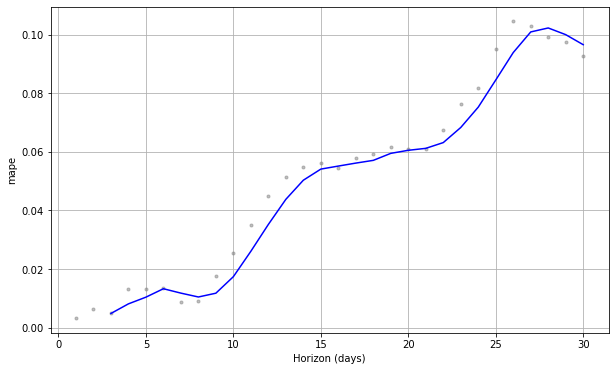

In [23]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')